In [43]:
%reset -f
%load_ext autoreload
%autoreload 2
import pandas as pd
import numpy as np
from tabulate import tabulate
import mestim as M              # routines for M-estimation given general sample objective functions
from matplotlib import pyplot as plt
import scipy.stats as st
import statsmodels.api as sm
import seaborn as sns

df = pd.read_csv('dataset.csv')
Nobs=df['ID'].count()
df['const']=np.ones((Nobs,1))
df.rename(columns={'Fast charge (min)':'ChargeTime'},inplace=True)
data = df[df['Market share'] != 0]
data.head(20)


The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


,ID,year,Market share,Manufacturer,Model,Range,Price,HP,ChargeTime,Type,Segment,Country,const
8,1,2021,0.010319,Aiways,U5,400,284622.00,201,34,SUV,C,CH,1.0
9,1,2022,0.005938,Aiways,U5,400,313682.00,201,34,SUV,C,CH,1.0
10,1,2023,0.002822,Aiways,U5,400,264524.00,201,34,SUV,C,CH,1.0
21,2,2023,0.000048,Aiways,U6,405,360638.00,214,34,SUV,C,CH,1.0
28,3,2019,0.040217,Audi,e-tron,375,979704.00,402,17,SUV,F,DE,1.0
29,3,2020,0.034512,Audi,e-tron,375,890101.00,402,17,SUV,F,DE,1.0
30,3,2021,0.010440,Audi,e-tron,375,800035.00,402,17,SUV,F,DE,1.0
31,3,2022,0.017456,Audi,e-tron,375,789724.00,402,17,SUV,F,DE,1.0
32,3,2023,0.001084,Audi,e-tron,375,673038.00,402,17,SUV,F,DE,1.0
41,4,2021,0.003373,Audi,e-tron GT,472,1278896.00,522,17,Sedan,F,DE,1.0


# Graphs

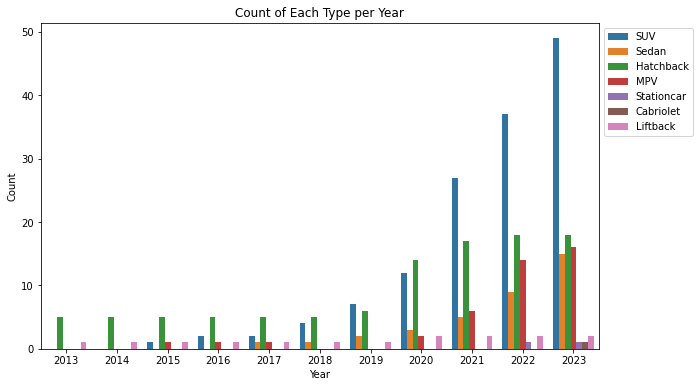

In [44]:
plt.figure(figsize=(10, 6))
sns.countplot(x='year', hue='Type', data=data)
plt.title('Count of Each Type per Year')
plt.xlabel('Year')
plt.ylabel('Count')
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))
plt.show()


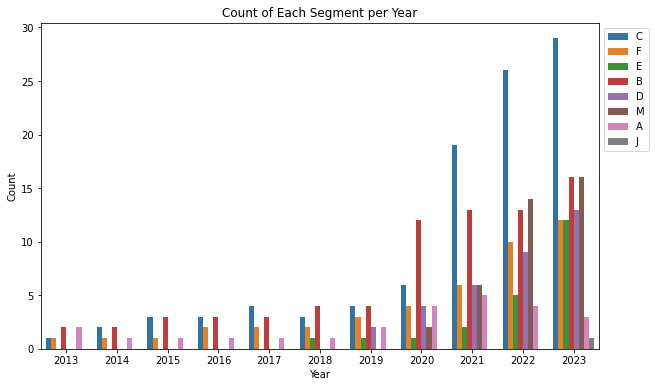

In [45]:
plt.figure(figsize=(10, 6))
sns.countplot(x='year', hue='Segment', data=data)
plt.title('Count of Each Segment per Year')
plt.xlabel('Year')
plt.ylabel('Count')
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))
plt.show()


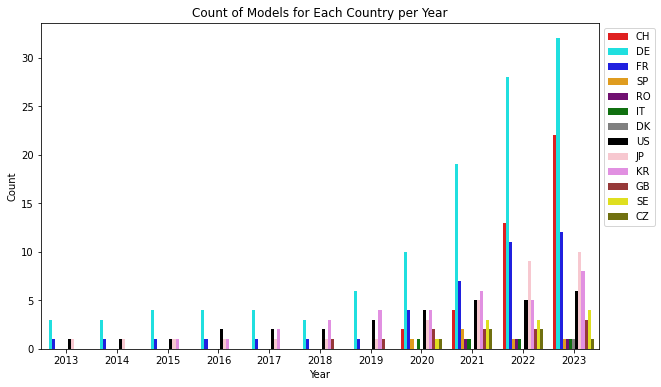

In [46]:
# Define the color mapping
color_dict = {'CH': 'red', 'US': 'black', 'DE': 'aqua', 'FR': 'blue', 'SP': 'orange', 'RO': 'purple', 'IT': 'green', 'DK': 'grey', 'JP': 'pink', 'KR': 'violet', 'GB': 'brown', 'SE': 'yellow', 'CZ': 'olive'}

plt.figure(figsize=(10, 6))
sns.countplot(x='year', hue='Country', data=data, palette=color_dict)
plt.title('Count of Models for Each Country per Year')
plt.xlabel('Year')
plt.ylabel('Count')
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))
plt.show()




/var/folders/84/nl1t_q050914klynvps92vkc0000gn/T/ipykernel_20454/3007061061.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Region'] = data['Country'].apply(regions)


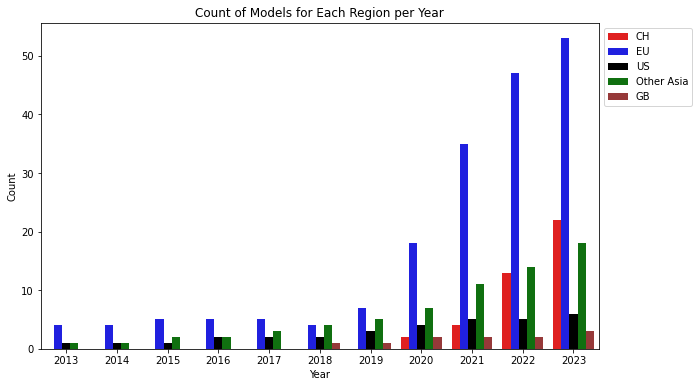

In [47]:
# Define a custom aggregation function
def regions(country):
    if country in ['DE', 'FR', 'DK', 'IT', 'RO', 'CZ', 'SP', 'SE']:
        return 'EU'
    elif country in ['JP', 'KR']:
        return 'Other Asia'
    else:
        return country

# Apply the function to the 'Country' column
data['Region'] = data['Country'].apply(regions)

# Define the color mapping
color_dict = {'CH': 'red', 'US': 'black', 'Other Asia': 'green', 'GB': 'brown', 'EU': 'blue'}

# Plot the count of models per country per year
plt.figure(figsize=(10, 6))
sns.countplot(x='year', hue='Region', data=data, palette=color_dict)
plt.title('Count of Models for Each Region per Year')
plt.xlabel('Year')
plt.ylabel('Count')
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))
plt.show()


# Creating dummies

In [48]:
data.head(20)

,ID,year,Market share,Manufacturer,Model,Range,Price,HP,ChargeTime,Type,Segment,Country,const,Region
8,1,2021,0.010319,Aiways,U5,400,284622.00,201,34,SUV,C,CH,1.0,CH
9,1,2022,0.005938,Aiways,U5,400,313682.00,201,34,SUV,C,CH,1.0,CH
10,1,2023,0.002822,Aiways,U5,400,264524.00,201,34,SUV,C,CH,1.0,CH
21,2,2023,0.000048,Aiways,U6,405,360638.00,214,34,SUV,C,CH,1.0,CH
28,3,2019,0.040217,Audi,e-tron,375,979704.00,402,17,SUV,F,DE,1.0,EU
29,3,2020,0.034512,Audi,e-tron,375,890101.00,402,17,SUV,F,DE,1.0,EU
30,3,2021,0.010440,Audi,e-tron,375,800035.00,402,17,SUV,F,DE,1.0,EU
31,3,2022,0.017456,Audi,e-tron,375,789724.00,402,17,SUV,F,DE,1.0,EU
32,3,2023,0.001084,Audi,e-tron,375,673038.00,402,17,SUV,F,DE,1.0,EU
41,4,2021,0.003373,Audi,e-tron GT,472,1278896.00,522,17,Sedan,F,DE,1.0,EU


In [49]:
# Creating dummies for each segment
data = pd.get_dummies(data, columns=['Segment'], drop_first=True)

# Creating dummies for each year
data = pd.get_dummies(data, columns=['year'], drop_first=True)

# Creating dummy for china
data['China'] = (data['Country'] == 'CH').astype(int)

# Creating log market share

In [50]:
# Take the log of the market share
data['log_market_share'] = np.log(data['Market share'])

# Independent OLS

In [51]:
y = data['log_market_share']
z = data[['const', 'Range', 'Price', 'HP', 'ChargeTime']]
dummies = data[['Segment_B', 'Segment_C', 'Segment_D', 'Segment_E', 'Segment_F', 'Segment_M', 'Segment_J',
                #'year_2012', 'year_2013', 'year_2014', 'year_2015', 'year_2016', 
                'China']]
X = pd.concat([z, dummies], axis=1)

In [52]:
OLS_model = sm.OLS(y, X)
OLS_result = OLS_model.fit()
# Print summary of the regression results
print(OLS_result.summary())

                            OLS Regression Results                            
Dep. Variable:       log_market_share   R-squared:                       0.280
Model:                            OLS   Adj. R-squared:                  0.253
Method:                 Least Squares   F-statistic:                     10.55
Date:                Tue, 05 Mar 2024   Prob (F-statistic):           1.14e-17
Time:                        16:06:37   Log-Likelihood:                -711.65
No. Observations:                 339   AIC:                             1449.
Df Residuals:                     326   BIC:                             1499.
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -6.6251      0.733     -9.035      0.0